# Quickstart to fglib2

First, let us declare four variables with different domains each.

In [7]:
from random_events.variables import Symbolic

x1 = Symbolic('x1', domain=range(2))
x2 = Symbolic('x2', domain=range(3))
x3 = Symbolic('x3', domain=range(4))
x4 = Symbolic('x4', domain=range(5))

Next, let's create random factors for some pairs of variables. We can shortcut the creation of factors by using the `*` operator instead of adding the nodes and edges manually. 

In [8]:
from fglib2.graphs import FactorNode
from fglib2.distributions import Multinomial
import numpy as np

np.random.seed(420)

f_x1_x2 = FactorNode(Multinomial([x1, x2], np.random.rand(len(x1.domain), len(x2.domain))))
f_x2_x3 = FactorNode(Multinomial([x2, x3], np.random.rand(len(x2.domain), len(x3.domain))))
f_x2_x4 = FactorNode(Multinomial([x2, x4], np.random.rand(len(x2.domain), len(x4.domain))))

graph = f_x1_x2 * f_x2_x3 * f_x2_x4

We can now draw the graph using ordinary networkx functions.

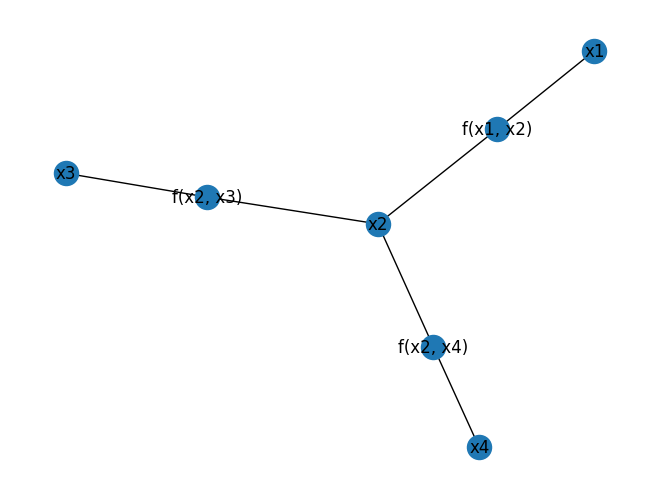

In [9]:
import networkx as nx
nx.draw(graph, with_labels=True)

Calculating all marginal distributions is done by using the sum product algorithm.

In [10]:
graph.sum_product()
for variable in graph.variables:
    print(graph.belief(variable).to_tabulate())

╒══════╤═════════╕
│   x1 │       P │
╞══════╪═════════╡
│    0 │ 0.44998 │
├──────┼─────────┤
│    1 │ 0.55002 │
╘══════╧═════════╛
╒══════╤══════════╕
│   x2 │        P │
╞══════╪══════════╡
│    0 │ 0.324403 │
├──────┼──────────┤
│    1 │ 0.169548 │
├──────┼──────────┤
│    2 │ 0.506049 │
╘══════╧══════════╛
╒══════╤═══════════╕
│   x3 │         P │
╞══════╪═══════════╡
│    0 │ 0.333492  │
├──────┼───────────┤
│    1 │ 0.0419636 │
├──────┼───────────┤
│    2 │ 0.297586  │
├──────┼───────────┤
│    3 │ 0.326958  │
╘══════╧═══════════╛
╒══════╤══════════╕
│   x4 │        P │
╞══════╪══════════╡
│    0 │ 0.211013 │
├──────┼──────────┤
│    1 │ 0.165152 │
├──────┼──────────┤
│    2 │ 0.198958 │
├──────┼──────────┤
│    3 │ 0.14797  │
├──────┼──────────┤
│    4 │ 0.276907 │
╘══════╧══════════╛


The joint most probable state of the graph is calculated by using the max product algorithm.
The result is a random event that describes the most probable state.

In [11]:
graph.reset()
print(graph.max_product())

{Symbolic(name='x2'): (2,), Symbolic(name='x1'): (1,), Symbolic(name='x4'): (4,), Symbolic(name='x3'): (0,)}
